## Monte Carlo Influence Estimation
Notebook used for testing the social network enviroment and mainly used for the computation required in point 1 of the project.
Current implementation:
+ generates a random allocation for the ads of every category, basically does not take into account the bids yet
+ estimates the average number of seeds $|S|$ given the allocation
+ runs a Monte Carlo Influence Estimation algorithm with an increasing number of repetitions $R$
+ computes the error as: $ error = \sqrt{\frac{1}{R}\log (|S|) \log (\frac{1}{\sigma})} \cdot nodes$
with $\sigma = 0.05$
+ plots the error with respect to a specific MC run with a certain number of repetitions
+ plots the MC estimation of each run with its associated interval $\pm error$

### Currently Missing
+ generating the ads allocation through a real set of bids
+ citing the text: *"Use the best performance you obtain as a baseline and show the performance gap due a different number of iterations (also report the theoretical upper bound on the approximation error)"*

In [1]:
import numpy as np 
from SocialNetwork.social_network_environment import *
from SocialNetwork.activation_probabilities import *
from SocialNetwork.influence_estimation import *


In [2]:
enviroment = social_network_environment()
enviroment.init_from_json(json_path_network = 'Config/network.json', json_path_features = 'Config/features.json')

In [3]:
import random
import json
from greedy_demo import bids_simulation

categories = 5
adv_number = 7 # total advertisers for testing
ad_allocation = []

# setting up a random ad_allocation
learner_bids = [random.randint(0,4) for _ in range(categories)]

ad_allocation, _ = bids_simulation(learner_bids, adv_number, categories, enviroment)

json_slots = open('Config/prominence.json', 'r')
slots = json.load(json_slots)


In [5]:
seeds_num = estimate_seeds(social_network= enviroment, ad_allocation_list= ad_allocation,
                            learner_id=1, slot_prominence=slots['slots'], iterations= 1000)

None
None
None
None
3
None
None
5
None
None
3
None
None
None
None
None
5
None
None
3
None
5
None
None
None
None
5
None
None
5
None
None
None
None
None
None
3
3
None
None
5
5
None
None
3
None
5
3
None
5
None
None
None
None
3
None
None
5
None
None
3
None
None
None
None
None
5
None
None
3
None
5
None
None
None
None
5
None
None
5
None
None
None
None
None
None
3
3
None
None
5
5
None
None
3
None
5
3
None
5
None
None
None
None
3
None
None
5
None
None
3
None
None
None
None
None
5
None
None
3
None
5
None
None
None
None
5
None
None
5
None
None
None
None
None
None
3
3
None
None
5
5
None
None
3
None
5
3
None
5
None
None
None
None
3
None
None
5
None
None
3
None
None
None
None
None
5
None
None
3
None
5
None
None
None
None
5
None
None
5
None
None
None
None
None
None
3
3
None
None
5
5
None
None
3
None
5
3
None
5
None
None
None
None
3
None
None
5
None
None
3
None
None
None
None
None
5
None
None
3
None
5
None
None
None
None
5
None
None
5
None
None
None
None
None
None
3
3
None
None
5
5
None
None
3
None
5

In [6]:

iterations = np.arange(start = 10, stop = 1000, step = 10)
activations = []

for iter in iterations:
    node_prob = estimate_bids_influence( social_network= enviroment, ad_allocation_list= ad_allocation,
                                         learner_id=1, slot_prominence=slots['slots'], iterations= iter)
    net_percentage = np.mean(node_prob) * enviroment.active_nodes.shape[0]
    
    
    activations.append(net_percentage)
    print("ITER #",iter)



ITER # 10
ITER # 20
ITER # 30
ITER # 40
ITER # 50
ITER # 60
ITER # 70
ITER # 80
ITER # 90
ITER # 100
ITER # 110
ITER # 120
ITER # 130
ITER # 140
ITER # 150
ITER # 160
ITER # 170
ITER # 180
ITER # 190
ITER # 200
ITER # 210
ITER # 220
ITER # 230
ITER # 240
ITER # 250
ITER # 260
ITER # 270
ITER # 280
ITER # 290
ITER # 300
ITER # 310
ITER # 320
ITER # 330
ITER # 340
ITER # 350
ITER # 360
ITER # 370
ITER # 380
ITER # 390
ITER # 400
ITER # 410
ITER # 420
ITER # 430
ITER # 440
ITER # 450
ITER # 460
ITER # 470
ITER # 480
ITER # 490
ITER # 500
ITER # 510
ITER # 520
ITER # 530
ITER # 540
ITER # 550
ITER # 560
ITER # 570
ITER # 580
ITER # 590
ITER # 600
ITER # 610
ITER # 620
ITER # 630
ITER # 640
ITER # 650
ITER # 660
ITER # 670
ITER # 680
ITER # 690
ITER # 700
ITER # 710
ITER # 720
ITER # 730
ITER # 740
ITER # 750
ITER # 760
ITER # 770
ITER # 780
ITER # 790
ITER # 800
ITER # 810
ITER # 820
ITER # 830
ITER # 840
ITER # 850
ITER # 860
ITER # 870
ITER # 880
ITER # 890
ITER # 900
ITER # 910
ITER # 9

In [7]:
import math

sigma = 0.05 # probability that the estimate is outside the confidence interval
nodes = enviroment.adj_matrix.shape[0] # number of nodes
S = seeds_num # average number of seeds given the set of bids

errors = []
for iter in iterations:
    error = (math.sqrt( 1/iter * math.log(S) * math.log(1/sigma)) * nodes)
    errors.append(error)


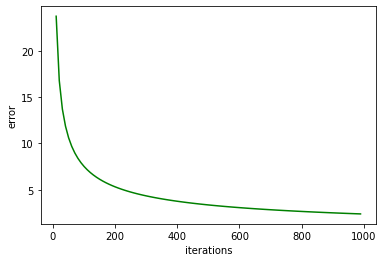

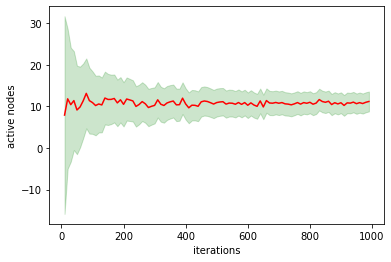

In [8]:
from matplotlib import pyplot as plt

errors = np.array(errors)
activations = np.array(activations)

plt.figure(0)
plt.plot(iterations, errors, "green")
plt.xlabel("iterations")
plt.ylabel("error")

plt.figure(1)
plt.plot(iterations, activations, "red")
plt.xlabel("iterations")
plt.ylabel("active nodes")
plt.fill_between(iterations, (activations-errors), (activations+errors), color = "green", alpha = 0.2)



plt.show()


